# Assignment 1 - Introduction To Data Science

### Group - 2

#### Team Members

- Gaurav Singhal -    2023mt03187, 
- Deepak Khandelwal - 2023mt03164, 
- Debleena Goswami -  2023mt03099


## Problem Statement
Device crashes can lead to significant downtime and loss of productivity, especially in environments where the device plays a critical role in daily operations. Predicting when a device might crash, based on various operational and environmental factors, can help mitigate these issues by enabling preemptive measures. 
The EDA exercise aims to analyze the data considering specific parameters of a mobile device ultimately to understans the features better and enable to predict device crash when required


## The Mobile Crash Data
The data has been used from Kaggle (link Below). As a team we discussed the varios factors in a real world scenario which can lead to low performance of a mobile device. The below step enlists the columns and values of the factors like CPU Usage, APP Name (Running in the device), Memory Usage, Battery Level , Temperature , Disk Space and more. Data Contains different type of attributes ranging from Numerical, Binary to Categorical.

https://kaggle.com/datasets/3b3c13874b0aef147f9ef900dfad1a5cf88bf3235fe076630ffb14516d029c46

In [170]:
# Importing the required python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [172]:
#Load the data set
df = pd.read_csv('mobile_crash_data_0927_v4.csv')
display(df)

,App_Name,CPU_Usage,Memory_Usage,Battery_Level,Temperature,Disk_Space,Network_Signal,App_Version,Error_Logs,Device_Model,Session_Time,Num_App_Crashes,Duration_Since_Last_Charge,App_Usage_Level,Crash_Label
0,Netflix,35.473619,52.048420,30.172434,22.554281,484.092409,77.382580,1.1,1,Model_C,183.227495,1,34.096485,Medium,0.0
1,Twitter,98.132710,35.675450,42.987039,50.852821,315.257899,88.066088,1.2,1,Model_C,171.332179,2,25.197136,Medium,1.0
2,Discord,61.316465,60.209320,33.431911,42.385092,13.540148,26.112746,1.2,0,Model_B,165.099603,1,32.869116,Low,0.0
3,Slack,86.208830,52.385562,65.454958,48.859789,333.167681,9.509667,1.2,0,Model_A,157.097694,1,16.238277,Low,0.0
4,Amazon,77.266467,57.531209,3.687373,47.114118,483.712841,13.691955,2.0,1,Model_B,151.324038,2,44.960682,Low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11555,Google Maps,89.834407,61.401764,122.810369,31.082843,366.066313,39.201901,1.1,1,Model_A,167.579146,2,38.006320,High,0.0
11556,Amazon,50.210780,49.393401,110.043715,14.901975,130.154397,48.069002,1.2,1,Model_B,179.100393,2,18.695275,High,0.0
11557,Netflix,60.857851,71.204257,129.408817,21.294194,229.378999,44.473365,2.0,1,Model_A,181.587891,2,7.985975,Low,0.0
11558,Uber,72.522893,39.601110,115.882346,45.646152,82.117291,53.128622,1.0,1,Model_B,177.625143,0,12.517502,Low,0.0


## Objective 1. Data Understanding

Establishing the Need for Data Understanding in Mobile Device Crash Prediction. 

Mobile device data might have missing values, outliers, or noisy entries (e.g., extreme temperature readings, erroneous app usage counts). Understanding the data helps identify and rectify these issues to avoid biased predictions.
The below steps involves generating the summary statistics which includes COUNT, # of UNIQUE VALUE , # FREQUENCY, MIN, MAX values etc.
The steps intend to establish understanding on the spread of data, identify data imbalance if any and also process data in a way that can lead to meaningful results 


### Objective 1.1. Generate Summary Statitics to understand Central Tendency and Dispersion in data.


In [173]:
# Summary statistics - 
#This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,App_Name,CPU_Usage,Memory_Usage,Battery_Level,Temperature,Disk_Space,Network_Signal,App_Version,Error_Logs,Device_Model,Session_Time,Num_App_Crashes,Duration_Since_Last_Charge,App_Usage_Level,Crash_Label
count,11560,11329.000000,11329.000000,11560.000000,11329.000000,11560.000000,11560.000000,11560.000000,11560.000000,11560,11560.000000,11560.000000,11560.000000,11560,11560.000000
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN
top,Discord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model_B,NaN,NaN,NaN,Medium,NaN
freq,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3893,NaN,NaN,NaN,5672,NaN
mean,NaN,62.397586,56.959348,50.304638,36.832064,257.773411,50.307640,1.327820,0.505709,NaN,170.070402,1.462976,23.875100,NaN,0.138235
std,NaN,16.272409,9.880617,28.954965,9.403873,147.875113,28.929610,0.398261,0.499989,NaN,11.999830,0.908865,13.837832,NaN,0.345162
min,NaN,4.310223,24.027532,0.000000,10.115146,0.047753,0.000930,1.000000,0.000000,NaN,127.948335,0.000000,0.004914,NaN,0.000000
25%,NaN,51.389702,50.215708,25.270028,31.205169,129.936641,25.440228,1.000000,0.000000,NaN,161.946831,1.000000,12.097158,NaN,0.000000
50%,NaN,62.486420,56.980808,50.390288,37.597585,257.998770,50.380077,1.200000,1.000000,NaN,170.231241,1.000000,23.827640,NaN,0.000000
75%,NaN,73.819859,63.572382,74.859107,43.533911,386.445334,75.435823,2.000000,1.000000,NaN,178.066092,2.000000,35.843880,NaN,0.000000


#### *Observation 1.1 from Summary Statics* -  
 1. Max for Batter_Level Attribute is going beyond 100 which is not meeting the conformity as max value for Battery_Level should be 100.

### Objective 1.2 Histogram Analysis -  
For Understanding the Distribution of Data we have used Histograms for the below reasons:
#### Normality Check: 
Many machine learning models (like linear regression, logistic regression) assume that the input features are normally distributed. A histogram helps to visually assess whether the data follows a normal distribution or if it's skewed.
#### Skewness Detection: 
Data might be left-skewed or right-skewed, indicating that most values are concentrated towards the lower or upper end of the range, respectively. This can impact how you preprocess the data (e.g., applying transformations like log or square root).

We have considered numeric and continuous variables like CPU Usage, Memory Usage, Battery Level, Disk Space for evaluation of the space the data is spread. This shall further help decide on the next steps of discretization, label encoding, normalization etc.

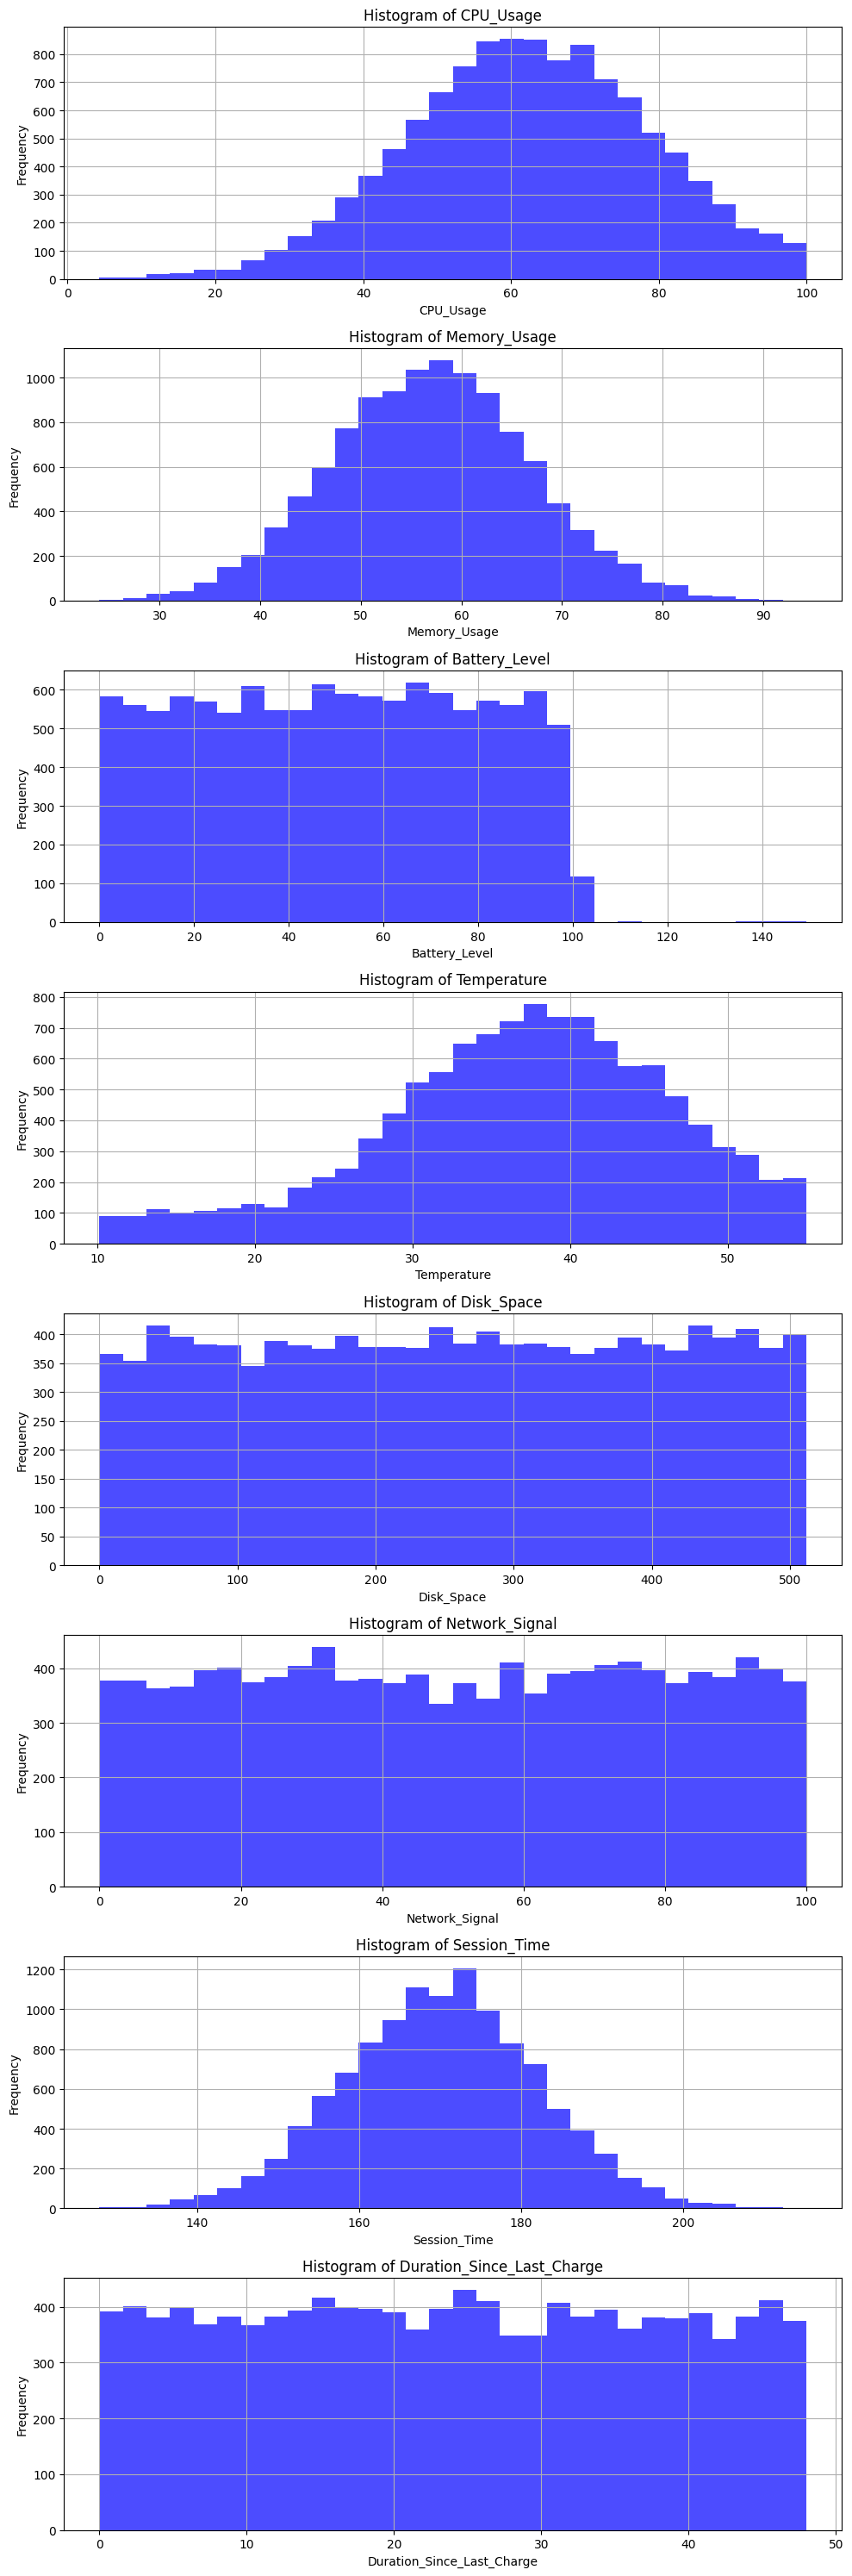

In [174]:
# Print Histograms for all numerical data (visualize data)
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]

fig, axes = plt.subplots(nrows=len(non_binary_non_discrete_numerical_columns), ncols=1, figsize=(10, 30))
# Iterate over numeric columns and create histograms
for i, column in enumerate(non_binary_non_discrete_numerical_columns):
    df[column].hist(ax=axes[i], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Observation 1.2 - Histogram

Data is left skewed for Cpu_Usage and Temprature
For attributes Duration_Since_Last_charge, Network_Signal, Disk Space, Battery_Level is largely uniformally distributed.
Session_Time and Memory_Usage are uniformly modeled.


### Objective 1.3 - Box Plot To Identify Outliers

Outlier detection and measuring Central Tendency. Here are the details of the BOX PLOT and the inferencing of the outcome from the plot:

#### Central Tendency: 
The box in the plot represents the interquartile range (IQR) and the line inside it indicates the median (50th percentile), providing a sense of where most data points cluster.For example median for CPU usage is approximately 61-65 and the IQR can be found between 50 and 70

#### Spread of the Data: 
The length of the box shows the range of the middle 50% of the data (from the 25th percentile to the 75th percentile), while the "whiskers" extend to show the variability outside the upper and lower quartiles. The data for Temperature, CPU_Usage, Disk Space shows the outliers in the lower quartiles. For Memory Usage there are instances where the outliers are observed in the upper quartiles

#### Outliers: 
Data points outside the whiskers are considered potential outliers. These are flagged with individual dots, helping to identify anomalies or rare occurrences in the dataset.

#### Skewness & Symmetry: 
The position of the median line within the box and the length of the whiskers help assess the skewness of the data. If the median is not centered or one whisker is longer, the data may be skewed either left or right.

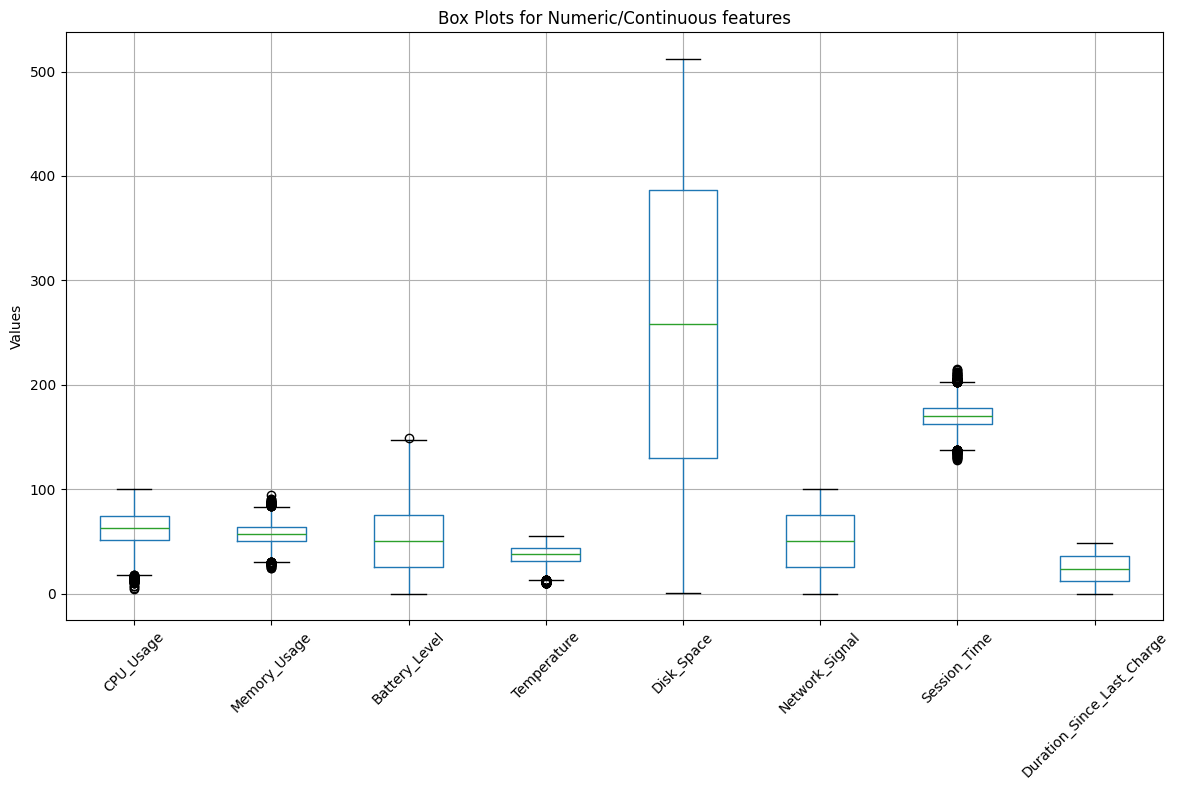

In [175]:
# Box Plot of numeric coloumns
import pandas as pd
import matplotlib.pyplot as plt

# Get numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
non_binary_non_discrete_numerical_columns = [col for col in numeric_columns if df[col].nunique() > 10]
new_df = df[non_binary_non_discrete_numerical_columns]
fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
new_df.boxplot(ax=ax)
plt.title("Box Plots for Numeric/Continuous features")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observation 1.3 

Outlier is often defined as any point that falls outside 1.5 times the interquartile range (IQR) above the 75th percentile (upper quartile) or below the 25th percentile (lower quartile) in a box plot. In normal distributions, points that are more than three standard deviations away from the mean

In above box plot Cpu_Usage, Memory_Usage, Battery_Level, Temprature, Session_Time have outliers. While Disk_Space, Network_Signal, Duration_Since_Last_Recharge do not have any out lier.

### Objective 1.4 Looking for Missing Value 

In [176]:
# Checking for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


App_Name                        0
CPU_Usage                     231
Memory_Usage                  231
Battery_Level                   0
Temperature                   231
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                    0
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64

## Objective 2 - Data Quality Checks and Cleanup

From Above understanding of data we could see issue related to Conformity in Battery_Level, Missing Value for Column Cpu_Usage, Temprature, and Battery_Level, Also outliers for multiple attributes as noted in above observations.

### Objective 2.1 - Cleanup Battery_Level, remove data objects above values 100.

In [177]:
# Find records greater than 100 in 'Battery Level' which is beyond conformity
outliers = df[df['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers['Battery_Level'])

# Remove records greater than 100
cleaned_data = df[df['Battery_Level'] <= 100]

outliers = cleaned_data[cleaned_data['Battery_Level'] > 100]
print("\nRecords greater than 100:")
display(outliers['Battery_Level'])


Records greater than 100:
11548    149.286188
11549    146.987775
11550    138.980624
11551    141.555246
11552    139.083107
11553    142.135888
11554    112.648205
11555    122.810369
11556    110.043715
11557    129.408817
11558    115.882346
11559    136.678449
Name: Battery_Level, dtype: float64

Records greater than 100:


Series([], Name: Battery_Level, dtype: float64)

### Objective 2.2 Identify outliers in all numeric coloumns and remove those records.


cleaned_data summary
          CPU_Usage  Memory_Usage  Battery_Level   Temperature    Disk_Space  \
count  11317.000000  11317.000000   11548.000000  11317.000000  11548.000000   
mean      62.396201     56.960900      50.219615     36.838100    257.815966   
std       16.275145      9.876400      28.846484      9.401749    147.880769   
min        4.310223     24.027532       0.000000     10.115146      0.047753   
25%       51.401378     50.218679      25.264509     31.214783    129.893457   
50%       62.487586     56.980808      50.375528     37.598273    258.065780   
75%       73.819859     63.572382      74.780431     43.535505    386.511185   
max       99.952131     94.278519     100.000000     55.000000    511.929107   

       Network_Signal   App_Version    Error_Logs  Session_Time  \
count    11548.000000  11548.000000  11548.000000  11548.000000   
mean        50.303771      1.327684      0.505715    170.068714   
std         28.935591      0.398166      0.499989     12.

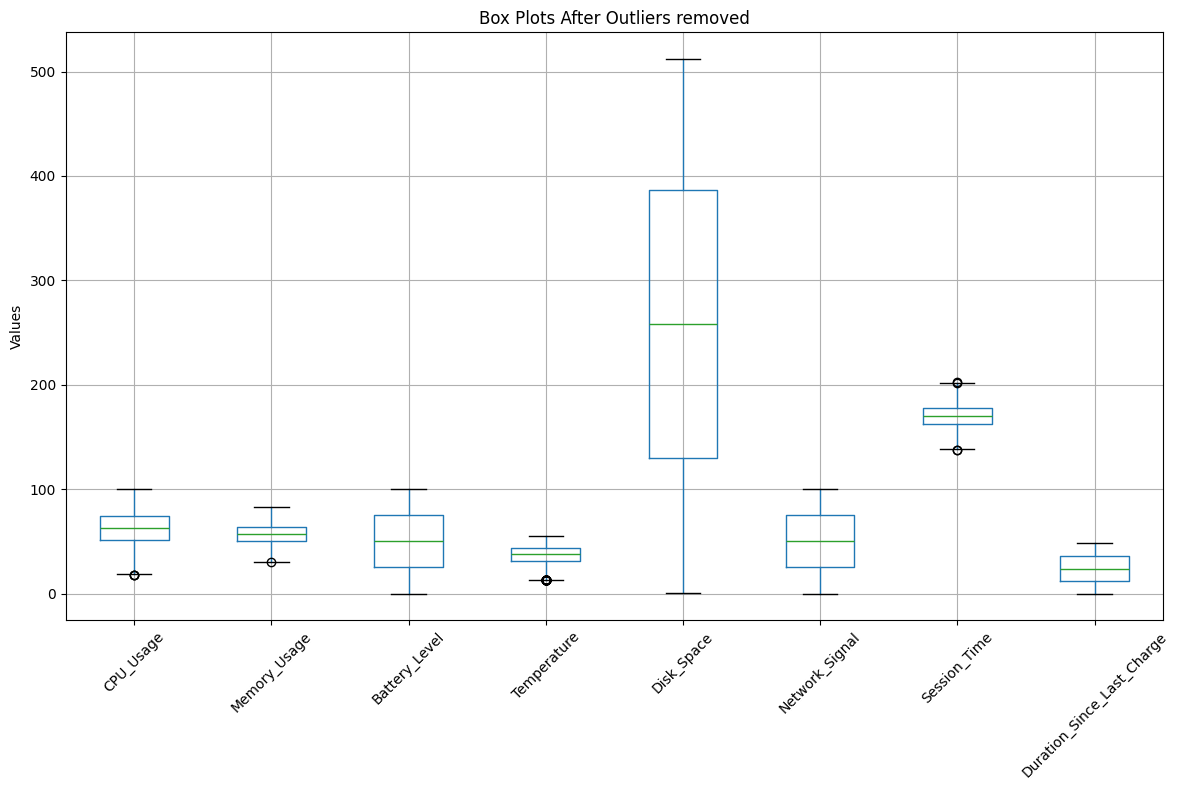

In [178]:
# Identify outliers in all numeric coloumns
new_df = cleaned_data.copy()
numeric_cols = cleaned_data.select_dtypes(include=np.number).columns
non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if cleaned_data[col].nunique() > 10]

print(f"cleaned_data summary")
print(f"=======================================================================")
print(cleaned_data.describe())
for col in non_binary_non_discrete_numerical_columns:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{col}, Outliers Range[lb, ub] => [{lower_bound},  {upper_bound}] ")
    print(f"=====================================================================")
    filtered_df = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]
    if not filtered_df.empty:
        print(filtered_df.head(4))
        print(f"\n")
    # removing outliers in this coloumn
    temp_df = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    new_df[col] = temp_df[col]

non_binary_non_discrete_numerical_columns = [col for col in numeric_cols if new_df[col].nunique() > 10]
non_binary_non_discrete_numerical_columns_df =  new_df[non_binary_non_discrete_numerical_columns]

fig, ax = plt.subplots(figsize=(12, 8))
# Create box plots
non_binary_non_discrete_numerical_columns_df.boxplot(ax=ax)
#new_df.boxplot(ax=ax)

plt.title("Box Plots After Outliers removed")
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cleaned_data = new_df

### Objective 2.3 - Fill Missing values using mean, median and forward fill..

In [179]:
# Missing values
print("\nMissing Values Before Imputation:")
print(cleaned_data.isnull().sum())

cleaned_data['CPU_Usage']=cleaned_data['CPU_Usage'].fillna(cleaned_data['CPU_Usage'].mean())

cleaned_data['Memory_Usage']=cleaned_data['Memory_Usage'].fillna(cleaned_data['Memory_Usage'].median())

cleaned_data['Temperature']=cleaned_data['Temperature'].ffill()
cleaned_data['Session_Time']=cleaned_data['Session_Time'].fillna(cleaned_data['Session_Time'].median())


print("\nMissing Values after imputation:")
print(cleaned_data.isnull().sum())

## round to 2 decimal digit
cleaned_data = cleaned_data.round(2)
display(cleaned_data)


Missing Values Before Imputation:
App_Name                        0
CPU_Usage                     281
Memory_Usage                  308
Battery_Level                   0
Temperature                   390
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                   97
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64

Missing Values after imputation:
App_Name                      0
CPU_Usage                     0
Memory_Usage                  0
Battery_Level                 0
Temperature                   0
Disk_Space                    0
Network_Signal                0
App_Version                   0
Error_Logs                    0
Device_Model                  0
Session_Time                  0
Num_App_Crashes               0
Duration_Since_Last_Char

,App_Name,CPU_Usage,Memory_Usage,Battery_Level,Temperature,Disk_Space,Network_Signal,App_Version,Error_Logs,Device_Model,Session_Time,Num_App_Crashes,Duration_Since_Last_Charge,App_Usage_Level,Crash_Label
0,Netflix,35.47,52.05,30.17,22.55,484.09,77.38,1.1,1,Model_C,183.23,1,34.10,Medium,0.0
1,Twitter,98.13,35.68,42.99,50.85,315.26,88.07,1.2,1,Model_C,171.33,2,25.20,Medium,1.0
2,Discord,61.32,60.21,33.43,42.39,13.54,26.11,1.2,0,Model_B,165.10,1,32.87,Low,0.0
3,Slack,86.21,52.39,65.45,48.86,333.17,9.51,1.2,0,Model_A,157.10,1,16.24,Low,0.0
4,Amazon,77.27,57.53,3.69,47.11,483.71,13.69,2.0,1,Model_B,151.32,2,44.96,Low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,Instagram,73.49,57.95,85.08,29.07,234.37,52.66,2.0,0,Model_B,166.75,2,6.48,Low,0.0
11544,Uber,64.50,46.77,17.43,35.29,17.56,20.65,1.2,0,Model_C,178.27,4,39.68,Low,0.0
11545,Instagram,30.56,79.29,82.77,49.81,336.58,0.38,2.0,1,Model_A,163.04,1,6.91,High,0.0
11546,Amazon,37.57,47.94,66.12,22.76,130.19,98.05,1.1,1,Model_B,164.14,1,16.24,Medium,0.0


## Objective 3 - Data Preprocessing

Based on above understanding of data, this step will involve
1. Discritization of Battery_Level using Binning into 6 distinct ranges.
2. Label Encoding of Categorical Attributes to make all attributes numeric
3. Data Normalization

### Objective 3.1 Binning involves grouping continuous data into discrete categories or bins.
 Discretization is a process of converting continuous variables into discrete #. Involves binning and converting values into predefined categories based on certain criteria.
##### Distance binning
#####  Formula -> interval = (max-min) / Number of Bins
##### Let us consider the 'Session_Time' continuous value column for binning

In [180]:

min_value = cleaned_data['Session_Time'].min()
max_value = cleaned_data['Session_Time'].max()

# Suppose the bin size is 4
# Returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min_value,max_value,4)
display(bins)

array([137.96      , 159.36333333, 180.76666667, 202.17      ])

#### Labeling and grouping into fixed categories

In [181]:
labels = ['Low', 'Medium', 'High'];

# We need to specify the bins and the labels.
cleaned_data['Session_Time'] = pd.cut(cleaned_data['Session_Time'], bins=bins, labels=labels, include_lowest=True)
display(cleaned_data['Session_Time'])


0          High
1        Medium
2        Medium
3           Low
4           Low
          ...  
11543    Medium
11544    Medium
11545    Medium
11546    Medium
11547    Medium
Name: Session_Time, Length: 11548, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### Objective 3.2 Use Label Encoder to make all categorical attributes as numerical

There are 4 categorical attributes - App_Usage_Level, Device_Model, App_Name, Battery_Level. As  models only understand numerical values, its important to convert all categorical attributes to numerical.


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
cleaned_data['App_Usage_Level']=le.fit_transform(cleaned_data['App_Usage_Level'])

cleaned_data['Device_Model']=le.fit_transform(cleaned_data['Device_Model'])

cleaned_data['App_Name']=le.fit_transform(cleaned_data['App_Name'])

cleaned_data['Session_Time']=le.fit_transform(cleaned_data['Session_Time'])

# Validate if now all attributes are numerical
print("\nData Types:")
display(cleaned_data.dtypes)

display(cleaned_data)


Data Types:


App_Name                        int64
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                 float64
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                    int64
Session_Time                    int64
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                 int64
Crash_Label                   float64
dtype: object

,App_Name,CPU_Usage,Memory_Usage,Battery_Level,Temperature,Disk_Space,Network_Signal,App_Version,Error_Logs,Device_Model,Session_Time,Num_App_Crashes,Duration_Since_Last_Charge,App_Usage_Level,Crash_Label
0,6,35.47,52.05,30.17,22.55,484.09,77.38,1.1,1,2,0,1,34.10,2,0.0
1,11,98.13,35.68,42.99,50.85,315.26,88.07,1.2,1,2,2,2,25.20,2,1.0
2,1,61.32,60.21,33.43,42.39,13.54,26.11,1.2,0,1,2,1,32.87,1,0.0
3,7,86.21,52.39,65.45,48.86,333.17,9.51,1.2,0,0,1,1,16.24,1,0.0
4,0,77.27,57.53,3.69,47.11,483.71,13.69,2.0,1,1,1,2,44.96,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,4,73.49,57.95,85.08,29.07,234.37,52.66,2.0,0,1,2,2,6.48,1,0.0
11544,12,64.50,46.77,17.43,35.29,17.56,20.65,1.2,0,2,2,4,39.68,1,0.0
11545,4,30.56,79.29,82.77,49.81,336.58,0.38,2.0,1,0,2,1,6.91,0,0.0
11546,0,37.57,47.94,66.12,22.76,130.19,98.05,1.1,1,1,2,1,16.24,2,0.0


### Objective 3.3 - Normalize Numerical Data

Normalization brings all attributes in uniform data range. Many of the attributes in our data site like Disk_Space , Duration_Since_Last_Charge are in high ranges which can influence the outcome.
Data will be normalized in [0,1] range using Min-Max Normalization technique.

In [183]:
# Normalize Numerical Data
# copy the data
df_min_max_scaled = cleaned_data.copy()

# Loop through each numerical column
for column in df_min_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    min_val = df_min_max_scaled[column].min()
    max_val = df_min_max_scaled[column].max()
    df_min_max_scaled[column] = (df_min_max_scaled[column] - min_val) / (max_val - min_val)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(df_min_max_scaled)


Normalized DataFrame:


,App_Name,CPU_Usage,Memory_Usage,Battery_Level,Temperature,Disk_Space,Network_Signal,App_Version,Error_Logs,Device_Model,Session_Time,Num_App_Crashes,Duration_Since_Last_Charge,App_Usage_Level,Crash_Label
0,0.428571,0.215094,0.409254,0.3017,0.232134,0.945612,0.7738,0.1,1.0,1.0,0.0,0.25,0.710417,1.0,0.0
1,0.785714,0.977845,0.100094,0.4299,0.901798,0.615789,0.8807,0.2,1.0,1.0,1.0,0.50,0.525000,1.0,1.0
2,0.071429,0.529763,0.563362,0.3343,0.701609,0.026354,0.2611,0.2,0.0,0.5,1.0,0.25,0.684792,0.5,0.0
3,0.500000,0.832745,0.415675,0.6545,0.854709,0.650778,0.0951,0.2,0.0,0.0,0.5,0.25,0.338333,0.5,0.0
4,0.000000,0.723920,0.512748,0.0369,0.813299,0.944870,0.1369,1.0,1.0,0.5,0.5,0.50,0.936667,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,0.285714,0.677906,0.520680,0.8508,0.386417,0.457764,0.5266,1.0,0.0,0.5,1.0,0.50,0.135000,0.5,0.0
11544,0.857143,0.568472,0.309537,0.1743,0.533602,0.034207,0.2065,0.2,0.0,1.0,1.0,1.00,0.826667,0.5,0.0
11545,0.285714,0.155326,0.923702,0.8277,0.877189,0.657439,0.0038,1.0,1.0,0.0,1.0,0.25,0.143958,0.0,0.0
11546,0.000000,0.240657,0.331634,0.6612,0.237104,0.254239,0.9805,0.1,1.0,0.5,1.0,0.25,0.338333,1.0,0.0


 ## Objective 4 - Feature Selection

 Implement feature selection techniques and display the top 5 features that contribute the most to the
classification task.

 ### Objective 4.1 - Using Pearson Correlation to find correlation between different attributes as well as with label attribute to do Fetaure Selection.

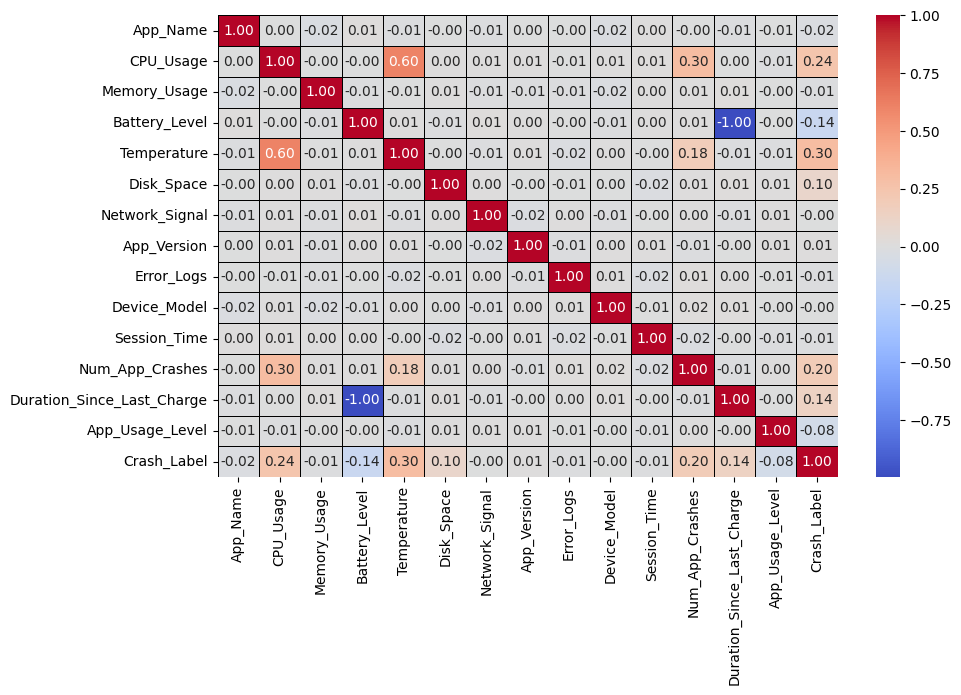

In [184]:
from tkinter import TRUE 
# Correlation Matrix - Internally uses Pearson Correlation
cor = df_min_max_scaled.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()

 #### *Observation 4.1*

Above Heat Map shows the correlation between multiple attributes. Below are the observations.

##### 1. Bettery_Level and Duration_Since_Last_charge are highly Negatively Correlated with each other. It means one feature is redundent and can be removed.
##### 2. CPU_Usage and Temprature are positively correlated , means when Cpu_Usage Increases, Temprature also increases.
##### 3. Attribute Cpu_Usage, Battery_Level, Temprature, Num_App_Crash, Disk_Space have correlation with Crash_Label and directly impacts it.

 ###### Generating Scatter Plot for Cpu_usage and Temprature to visulatize scatter plot and finding the standard deviation of values

11548
11548
Pearson correlation: -0.998


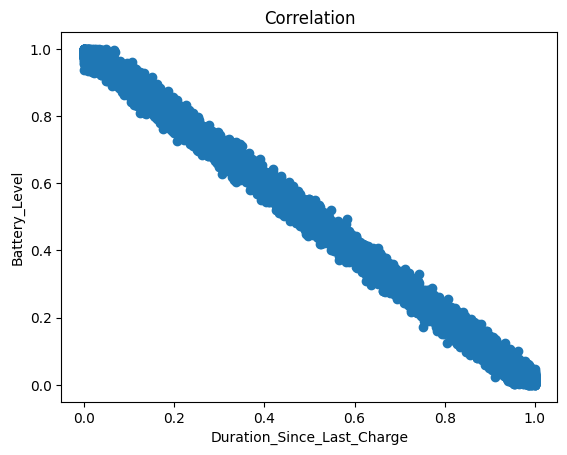

In [185]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df_min_max_scaled['Battery_Level']
list2 = df_min_max_scaled['Duration_Since_Last_Charge']
print(list1.size)
print(list2.size)

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, heat also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
plt.title("Correlation")
plt.ylabel('Battery_Level')
plt.xlabel('Duration_Since_Last_Charge')
pyplot.show()

 ### Objective 4.2

1. Removing Duration_Since_Last_charge as it is redundent 

In [186]:
# Removing Duration_Since_Last_charge as it is redundent

data_cleaned = df_min_max_scaled.drop(columns=['Duration_Since_Last_Charge'])
display(data_cleaned.dtypes)


App_Name           float64
CPU_Usage          float64
Memory_Usage       float64
Battery_Level      float64
Temperature        float64
Disk_Space         float64
Network_Signal     float64
App_Version        float64
Error_Logs         float64
Device_Model       float64
Session_Time       float64
Num_App_Crashes    float64
App_Usage_Level    float64
Crash_Label        float64
dtype: object

 ### Objective 4.3

1. Finding top 5 features that contribute the most to the classification task.

   Though it is clear from Heatmap what features are important and impacting the Crash_Label, We will be using FeatureImportance mechanism to visualize it.

In [125]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()

#App_Name           float64   0
#CPU_Usage          float64   1
#Memory_Usage       float64   2
#Battery_Level      float64   3
#Temperature        float64   4
#Disk_Space         float64   5
#Network_Signal     float64   6
#App_Version        float64   7
#Error_Logs         float64   8
#Device_Model       float64   9
#Session_Time       float64  10
#Num_App_Crashes    float64  11
#App_Usage_Level    float64  12
#Crash_Label        float64  13
dtype: object


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature: App_Name, Score: 0.00219
Feature: CPU_Usage, Score: 0.01414
Feature: Memory_Usage, Score: 0.00264
Feature: Battery_Level, Score: 0.21523
Feature: Temperature, Score: 0.45329
Feature: Disk_Space, Score: 0.17815
Feature: Network_Signal, Score: 0.00317
Feature: App_Version, Score: 0.00083
Feature: Error_Logs, Score: 0.00026
Feature: Device_Model, Score: 0.00049
Feature: Session_Time, Score: 0.00047
Feature: Num_App_Crashes, Score: 0.02411
Feature: App_Usage_Level, Score: 0.10504


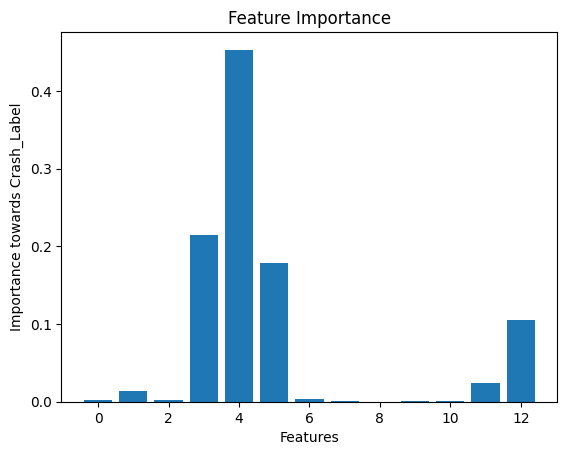

In [187]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()

X = data_cleaned.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] 
Y = data_cleaned.iloc[:,[13]]  

# fit the model
model.fit(X,Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {X.columns[i]}, Score: {v:.5f}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance")
plt.ylabel('Importance towards Crash_Label')
plt.xlabel('Features')
plt.show()

 #### *Observation 4.3*

1. Top 5 Features contributing most in descending order -
   - Temprature
   - Battery_Level
   - Disk_Space
   - App_Usage_Level
   - Num_App_Crashes


   Thankyou !
   
   
   
     